In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [32]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [33]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [34]:
def display(i):
    img=test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

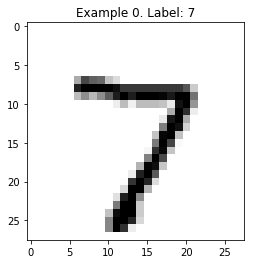

In [35]:
display(0)

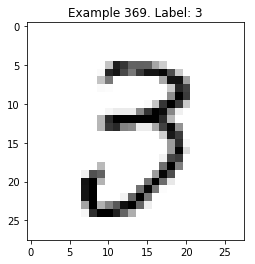

In [36]:
display(369)

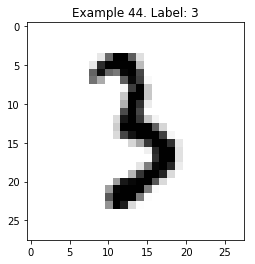

In [37]:
display(44)

In [38]:
print(len(data[10]))

784


In [39]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1c214c2e10>, 'joint_weights': False, 'optimizer': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]})

In [40]:
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

0.9137


Predicted 7, Label: 7


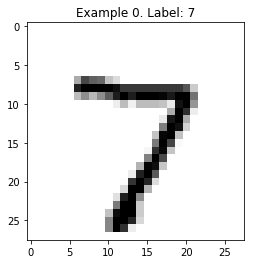

In [44]:
prediction = classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[0]))
display(0)

Predicted 6, Label: 5


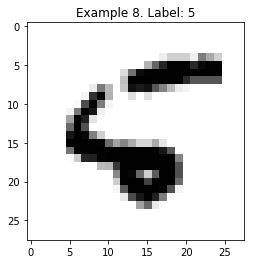

In [49]:
prediction = classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[8]))
display(8)